In [1]:
import pandas as pd

>Visualizando as páginas do arquivo.

In [2]:
url = 'https://seeg-br.s3.amazonaws.com/Estat%C3%ADsticas/SEEG10/1-SEEG10_GERAL-BR_UF_2022.10.27-FINAL-SITE.xlsx'
pd.ExcelFile(url).sheet_names

['LEIA ANTES',
 'HISTÓRICO DE VERSOES',
 'GEE Brasil',
 'GEE Estados',
 'CONSULTA BRASIL',
 'CONSULTA ESTADOS',
 'CONSULTA ATIV ECONOMICA',
 'Arvore Hierarquica',
 'GWP e GTP',
 'Gases Por Setor',
 'Estados',
 'Atividade Economica',
 'Produto']

>Acessando dados de interesse.


In [3]:
dados = pd.read_excel(url, sheet_name='GEE Estados')

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


###1) Encontre os valores únicos das colunas "Nível 1 - Setor" e "Estado" para identificar as atividades econômicas presentes na base de dados e se todos os Estados do Brasil estão presentes no DataFrame.

In [4]:
atividades_economicas = dados['Nível 1 - Setor'].unique()
atividades_economicas

array(['Processos Industriais', 'Agropecuária', 'Energia', 'Resíduos ',
       'Mudança de Uso da Terra e Floresta'], dtype=object)

In [5]:
lista_estado = [
    "AC", "AL", "AP", "AM", "BA", "CE", "DF", "ES", "GO",
    "MA", "MT", "MS", "MG", "PA", "PB", "PR", "PE", "PI",
    "RJ", "RN", "RS", "RO", "RR", "SC", "SP", "SE", "TO"
]


In [6]:
dados.Estado.unique().shape

(29,)

In [7]:
estados = [x for x in dados.Estado.unique() if x in lista_estado]
len(estados)

27

###2) Filtre o DataFrame somente com os dados dos Estados da região Sul do Brasil.

In [8]:
regiao_sul = dados[dados['Estado'].isin(["PR", "SC", "RS"])]
regiao_sul

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
35,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,Emissão,CO2 (t),PR,OUTRA_IND,...,4.562042e+05,4.682616e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05
36,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,Emissão,CO2e (t) GWP-AR2,PR,OUTRA_IND,...,4.562042e+05,4.682616e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05
37,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,Emissão,CO2e (t) GTP-AR2,PR,OUTRA_IND,...,4.562042e+05,4.682616e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05
110,Processos Industriais,Produtos Minerais,Produção de Cimento,NaN,NaN,NaN,Emissão,CO2 (t),PR,CIM,...,2.012596e+06,2.212002e+06,2.241143e+06,2.176752e+06,2.279061e+06,2.115372e+06,2.173266e+06,2.230656e+06,2.488650e+06,2.845457e+06
111,Processos Industriais,Produtos Minerais,Produção de Cimento,NaN,NaN,NaN,Emissão,CO2 (t),SC,CIM,...,7.126368e+05,6.421719e+05,8.163383e+05,6.769844e+05,5.272686e+05,5.143665e+05,5.130451e+05,5.451073e+05,6.144431e+05,7.179804e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103221,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pampa,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR2,RS,AGROPEC,...,1.108518e+06,1.479183e+06,9.718840e+05,9.948190e+05,7.698680e+05,9.057280e+05,9.238730e+05,1.046432e+06,1.439095e+06,1.432812e+06
103222,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pampa,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR4,RS,AGROPEC,...,1.196999e+06,1.599471e+06,1.045298e+06,1.070678e+06,8.308050e+05,9.748940e+05,9.924510e+05,1.124747e+06,1.543126e+06,1.541087e+06
103223,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pampa,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR5,RS,AGROPEC,...,1.221927e+06,1.635136e+06,1.062603e+06,1.089187e+06,8.475340e+05,9.918540e+05,1.007627e+06,1.142614e+06,1.563684e+06,1.566694e+06
103224,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pampa,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR6,RS,AGROPEC,...,1.232994e+06,1.649637e+06,1.072887e+06,1.099601e+06,8.553060e+05,1.001321e+06,1.017557e+06,1.153771e+06,1.579514e+06,1.581831e+06


###3) Filtre o DataFrame somente com os dados de "Mudança de Uso da Terra e Floresta" que sejam do Estado do Amazonas.

In [9]:
md_amazonas = dados.loc[(dados['Nível 1 - Setor'] == 'Mudança de Uso da Terra e Floresta') & (dados['Estado'] == 'AM')]
md_amazonas

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
81262,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Amazônia,fora de Área Protegida,Desmatamento,Floresta primária -- Área sem vegetação,Emissão,CO2 (t),AM,AGROPEC,...,8.511800e+04,9.763700e+04,8.761900e+04,1.218150e+05,1.137590e+05,5.299800e+04,6.117000e+04,48264.0,14381.0,31867.0
81271,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Amazônia,fora de Área Protegida,Desmatamento,Floresta primária -- Área sem vegetação,Emissão,CO2e (t) GTP-AR2,AM,AGROPEC,...,8.511800e+04,9.763700e+04,8.761900e+04,1.218150e+05,1.137590e+05,5.299800e+04,6.117000e+04,48264.0,14381.0,31867.0
81280,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Amazônia,fora de Área Protegida,Desmatamento,Floresta primária -- Área sem vegetação,Emissão,CO2e (t) GTP-AR4,AM,AGROPEC,...,8.511800e+04,9.763700e+04,8.761900e+04,1.218150e+05,1.137590e+05,5.299800e+04,6.117000e+04,48264.0,14381.0,31867.0
81289,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Amazônia,fora de Área Protegida,Desmatamento,Floresta primária -- Área sem vegetação,Emissão,CO2e (t) GTP-AR5,AM,AGROPEC,...,8.511800e+04,9.763700e+04,8.761900e+04,1.218150e+05,1.137590e+05,5.299800e+04,6.117000e+04,48264.0,14381.0,31867.0
81298,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Amazônia,fora de Área Protegida,Desmatamento,Floresta primária -- Área sem vegetação,Emissão,CO2e (t) GTP-AR6,AM,AGROPEC,...,8.511800e+04,9.763700e+04,8.761900e+04,1.218150e+05,1.137590e+05,5.299800e+04,6.117000e+04,48264.0,14381.0,31867.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102803,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Amazônia,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR2,AM,AGROPEC,...,2.239997e+06,3.186571e+06,2.973253e+06,4.796274e+06,7.396711e+06,4.362453e+06,4.434835e+06,7074966.0,8746520.0,8429758.0
102812,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Amazônia,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR4,AM,AGROPEC,...,2.505953e+06,3.565317e+06,3.330733e+06,5.368844e+06,8.276064e+06,4.888099e+06,4.967871e+06,7929733.0,9799770.0,9408067.0
102821,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Amazônia,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR5,AM,AGROPEC,...,2.651128e+06,3.772286e+06,3.528292e+06,5.683071e+06,8.756712e+06,5.179207e+06,5.262358e+06,8404321.0,10382705.0,9929881.0
102830,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Amazônia,NaN,Desmatamento,NaN,Emissão,CO2e (t) GWP-AR6,AM,AGROPEC,...,2.661898e+06,3.787545e+06,3.541992e+06,5.705721e+06,8.792123e+06,5.199159e+06,5.282817e+06,8436366.0,10422789.0,9973416.0


###4) Encontre o valor máximo de emissão do ano de 2021 para os dados de "Agropecuária" no Estado do Pará.

In [10]:
dados.loc[(dados['Nível 1 - Setor'] == 'Agropecuária') & (dados['Estado'] == 'PA'), 2021].max()

36856969.7986

###1) Faça um agrupamento de dados com base na coluna "Nível 1 - Setor" para visualizar o dicionário contendo as chaves de grupos formados e a lista de índices de cada grupo.

In [11]:
dados.groupby('Nível 1 - Setor').groups

{'Agropecuária': [1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 1160, 1161, 1162, 1163, 1164, 1165, 1166, 1167, 1168, 1169, 1170, 1171, 1172, 1173, 1174, 1175, 1176, 1177, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1210, 1211, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1228, 1229, 1230, 1231, 1232, 1233, 1234, 1235, 1236, ...], 'Energia': [24735, 24736, 24737, 24738, 24739, 24740, 24741, 24742, 24743, 24744, 24745, 24746, 24747, 24748, 24749, 24750, 24751, 24752, 24753, 24754, 24755, 24756, 24757, 24758, 24759, 24760, 24761, 24762, 24763, 24764, 24765, 24766, 24767, 24768, 24769, 24770, 24771, 24772, 24773, 24774, 24775, 24776, 24777, 24778, 24779, 24780, 24781, 24782, 24783, 24784, 24785, 24786, 

###2) Faça um agrupamento de dados com base na coluna "Nível 1 - Setor" e localize os dados do grupo "Agropecuária".

In [12]:
dados.groupby('Nível 1 - Setor').get_group('Agropecuária').head()

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
1137,Agropecuária,Cultivo de Arroz,Diretas,Outros,Vegetal,Arroz,Emissão,CH4 (t),AC,AGR,...,0.00,0.000,0.000,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.00000
1138,Agropecuária,Cultivo de Arroz,Diretas,Outros,Vegetal,Arroz,Emissão,CH4 (t),AL,AGR,...,753.35,607.984,724.725,738.963,653.833,745.046666,788.666985,791.094957,623.372175,930.95704
1139,Agropecuária,Cultivo de Arroz,Diretas,Outros,Vegetal,Arroz,Emissão,CH4 (t),AM,AGR,...,0.00,0.000,0.000,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.00000
1140,Agropecuária,Cultivo de Arroz,Diretas,Outros,Vegetal,Arroz,Emissão,CH4 (t),AP,AGR,...,0.00,0.000,0.000,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.00000
1141,Agropecuária,Cultivo de Arroz,Diretas,Outros,Vegetal,Arroz,Emissão,CH4 (t),BA,AGR,...,57.20,167.310,16.848,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.00000


###3) Faça um agrupamento de dados com base na coluna "Nível 1 - Setor" para identificar a média de emissão de cada atividade econômica no ano de 2021.

In [13]:
dados.groupby('Nível 1 - Setor')[[2021]].mean()

,2021
Nível 1 - Setor,
Agropecuária,53082.725943
Energia,75120.049185
Mudança de Uso da Terra e Floresta,196843.405133
Processos Industriais,787101.255789
Resíduos,106106.723386


###4) Faça um agrupamento de dados com base na coluna "Nível 1 - Setor" para identificar a soma de emissão de cada atividade econômica. Ordene os dados da maior para menor emissão.

In [14]:
colunas_permanentes = dados.loc[:, 'Nível 1 - Setor': 'Atividade Econômica'].columns
colunas_derretidas = dados.loc[:, 1970: 2021].columns


In [26]:
dados_por_emissao = dados.melt(id_vars=colunas_permanentes, value_vars=colunas_derretidas, var_name='Ano', value_name='Emissão')
dados_por_emissao.drop(columns='Emissão / Remoção / Bunker', inplace=True)

In [27]:
dados_por_emissao.head()

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Ano,Emissão
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,COVNM (t),SP,OUTRA_IND,1970,0.0
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,N2O (t),SP,OUTRA_IND,1970,6210.0
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO (t),SP,OUTRA_IND,1970,368.0
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,NOx (t),SP,OUTRA_IND,1970,115.0
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO2e (t) GWP-AR2,SP,OUTRA_IND,1970,1925100.0


In [28]:
dados_soma_atividade = dados_por_emissao.groupby('Nível 1 - Setor')[['Emissão']].sum().sort_values('Emissão', ascending=False)
dados_soma_atividade

,Emissão
Nível 1 - Setor,
Mudança de Uso da Terra e Floresta,2.494463e+11
Energia,1.244170e+11
Agropecuária,1.107286e+11
Processos Industriais,2.849965e+10
Resíduos,1.034465e+10


<Axes: ylabel='Nível 1 - Setor'>

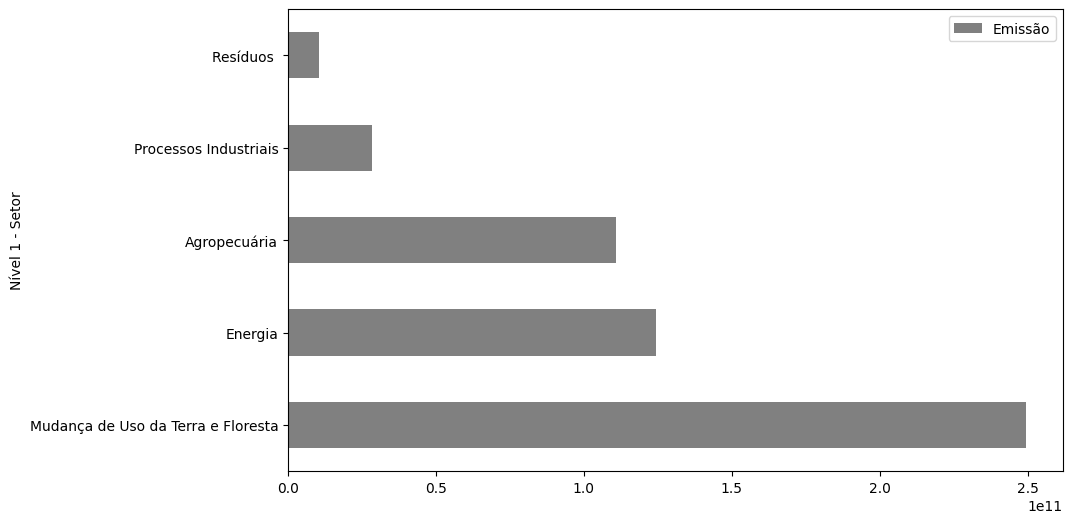

In [29]:
dados_soma_atividade.plot(kind='barh', figsize=(10, 6), color='grey')

###1) Faça um agrupamento de dados com as colunas "Estado" e "Nível 1 - Setor", obtendo a soma de emissão e armazenando o resultado em uma tabela.

In [34]:
dados_total_emissao_setor_estado = dados_por_emissao.groupby(['Estado', 'Nível 1 - Setor'])[['Emissão']].sum().reset_index()
dados_total_emissao_setor_estado

,Estado,Nível 1 - Setor,Emissão
0,AC,Agropecuária,-3.272006e+08
1,AC,Energia,2.071751e+08
2,AC,Mudança de Uso da Terra e Floresta,4.704492e+09
3,AC,Resíduos,2.928323e+07
4,AL,Agropecuária,1.215829e+09
...,...,...,...
128,TO,Agropecuária,2.789108e+09
129,TO,Energia,5.130379e+08
130,TO,Mudança de Uso da Terra e Floresta,6.486598e+09
131,TO,Processos Industriais,2.613905e+07


###2) Utilizando a tabela construída na atividade 1, selecione os dados referentes à "Energia" do índice "Nível 1 - Setor".

In [ ]:
dados_total_emissao_setor_estado.groupby('Nível 1 - Setor').get_group('Energia')

###) Utilizando a tabela construída na atividade 1, encontre a atividade econômica com valor máximo de emissão do Estado de Minas Gerais

In [42]:
dados_total_emissao_setor_estado.groupby('Estado').get_group('MG').max().to_frame().T

,Estado,Nível 1 - Setor,Emissão
0,MG,Resíduos,15572371696.336952


###4) Obtenha uma tabela contendo a atividade econômica com máxima emissão para cada Estado.

In [47]:
dados_emissao_por_atividade = dados_por_emissao.groupby(['Nível 1 - Setor', 'Estado'])[['Emissão']].max().reset_index()
dados_emissao_por_atividade

,Nível 1 - Setor,Estado,Emissão
0,Agropecuária,AC,6.351320e+06
1,Agropecuária,AL,2.657545e+06
2,Agropecuária,AM,2.221160e+06
3,Agropecuária,AP,4.807711e+05
4,Agropecuária,BA,2.720865e+07
...,...,...,...
128,Resíduos,RS,2.486975e+06
129,Resíduos,SC,1.569951e+06
130,Resíduos,SE,3.454479e+05
131,Resíduos,SP,9.574038e+06


In [48]:
dados_emissao_por_estado = dados_por_emissao.groupby(['Estado', 'Nível 1 - Setor'])[['Emissão']].max().reset_index()
dados_emissao_por_estado

,Estado,Nível 1 - Setor,Emissão
0,AC,Agropecuária,6.351320e+06
1,AC,Energia,7.858481e+05
2,AC,Mudança de Uso da Terra e Floresta,4.595510e+07
3,AC,Resíduos,1.953057e+05
4,AL,Agropecuária,2.657545e+06
...,...,...,...
128,TO,Agropecuária,1.538253e+07
129,TO,Energia,1.793473e+06
130,TO,Mudança de Uso da Terra e Floresta,3.532802e+07
131,TO,Processos Industriais,3.352453e+05
